In [55]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

In [56]:
data = pd.read_csv("decisiontree.csv",encoding='gbk')
data.head(10)

,是否获奖,电影类型,情感分析值,音乐,画面,导演,故事
0,1,1,0.411575,7.7,7.6,7.5,6.9
1,0,2,1.000000,6.6,7.1,6.6,6.4
2,0,3,0.999499,7.3,7.3,7.8,7.9
3,0,4,0.241763,6.9,7.2,7.2,6.6
4,0,5,0.997524,7.2,7.5,7.1,7.1
5,1,6,0.999932,7.3,7.5,7.6,7.7
6,0,7,0.697431,7.3,7.6,7.3,7.2
7,0,8,0.993273,7.0,7.2,7.4,7.1
8,0,9,0.997741,7.0,7.0,7.5,6.8
9,1,10,0.991193,7.8,7.7,7.7,7.4


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
是否获奖     165 non-null int64
电影类型     165 non-null int64
情感分析值    165 non-null float64
音乐       165 non-null float64
画面       165 non-null float64
导演       165 non-null float64
故事       165 non-null float64
dtypes: float64(5), int64(2)
memory usage: 9.1 KB


In [58]:
# compute the percentage of winning movie in the whole dataset
win_rate = data["是否获奖"].mean()
win_rate

0.20606060606060606

In [59]:
X= data.iloc[:,2:]
y = data.iloc[:,data.columns == "是否获奖"]

In [60]:
X.head()

,情感分析值,音乐,画面,导演,故事
0,0.411575,7.7,7.6,7.5,6.9
1,1.000000,6.6,7.1,6.6,6.4
2,0.999499,7.3,7.3,7.8,7.9
3,0.241763,6.9,7.2,7.2,6.6
4,0.997524,7.2,7.5,7.1,7.1


In [61]:
y.head()

,是否获奖
0,1
1,0
2,0
3,0
4,0


In [62]:
# split the datasets into train set and test set, test_size is the proportion of the test set in the whole dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size=0.3,stratify = y) #test size 30% stratify=y 保证train和test的比例是一样的 不会出现全都是获奖的

In [63]:
#查看分好的训练集和测试集
X_train.head()

,情感分析值,音乐,画面,导演,故事
6,0.697431,7.3,7.6,7.3,7.2
28,0.067041,6.9,7.5,7.2,6.6
84,0.999971,7.1,7.5,7.6,7.5
81,0.629562,8.1,8.0,8.6,7.9
83,0.991468,8.0,7.8,8.4,8.4


In [64]:
# compute the percentage of winning movie in train and test set
print("percentage of winning movie in train set", y_train.mean())

print("percentage of winning movie in test set",y_test.mean())

percentage of winning movie in train set 是否获奖    0.208696
dtype: float64
percentage of winning movie in test set 是否获奖    0.2
dtype: float64


In [65]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train) # train the model on the train set
# make predicitons
y_pred = clf.predict(X_test)

score = accuracy_score(y_test,y_pred)
score  

0.76


# our model doesn't perform well on the test set

In [66]:
# the accuracy score on the train set
score = accuracy_score(y_train,clf.predict(X_train))
score

1.0

# if we don't choose parameter for the decison tree, then it will classify the train set until different labels are totally separated. This will lead to overfiting!!!全部猜对。。。（选参数 对model加限制 让她在test不要表现太差 在train

0.7888071895424836


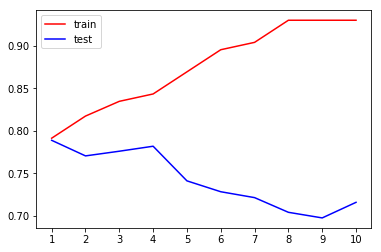

In [14]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1 
                                 ,criterion="entropy"
                                )
    clf = clf.fit(X_train, y_train)
    score_tr = clf.score(X_train,y_train) 
    score_te = cross_val_score(clf,X,y,cv=10).mean()#cv=10 cross validation
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

Our dataset is small (so small). If we use train test split, then there is not enough data point to train our model. So to use all the data, we can use cross validation.

In [15]:
tree_clf = DecisionTreeClassifier(random_state=42)

In [16]:
parameters ={'max_depth':range(1,11),'min_samples_leaf':range(1,11)}

In [73]:
clf = GridSearchCV(tree_clf, param_grid = parameters, cv=5,scoring = 'accuracy')

In [74]:
clf.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 11), 'min_samples_leaf': range(1, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:
# get the best parameter
clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 2}

In [76]:
clf.best_score_

0.8121212121212121

# visualize the decision tree

In [21]:
from sklearn import tree
import graphviz

In [77]:
tree_clf = DecisionTreeClassifier(random_state=42 , min_samples_leaf= 2, max_depth= 3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [78]:
X.columns

Index(['情感分析值', '音乐', '画面', '导演', '故事'], dtype='object')

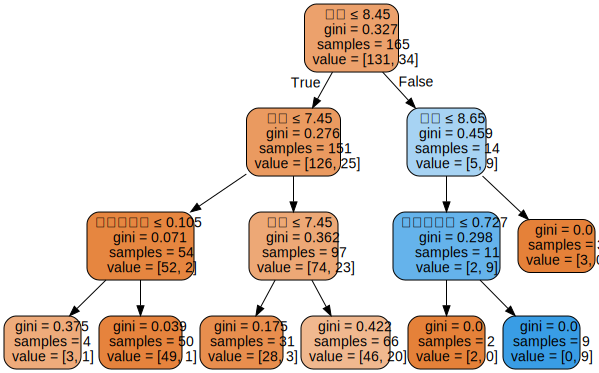

In [79]:
#visulize the decision tree classifier
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                      feature_names= X.columns,    
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#graph.render("cart_tree")
#gini mean square 使gini 越小越好 a+b部电影 a 获奖
#数据不是同一时间的 所以后续即使画质变好，也不一定获奖

In [80]:
tree_clf.feature_importances_

array([0.21268922, 0.        , 0.10415951, 0.68315127, 0.        ])

In [46]:
feature_importance = pd.Series(tree_clf.feature_importances_)

In [47]:
feature_importance.index = X.columns

In [48]:
feature_importance

情感分析值    0.212689
音乐       0.000000
画面       0.104160
导演       0.683151
故事       0.000000
dtype: float64

# 得不得奖最重要的是导演，然后是画面。因为我们的数据点不够多，所以在选了最优参数以后，故事得分不会用到分类中。

In [82]:
# compute the accuracy on the whole data set
tree_score=accuracy_score(y,tree_clf.predict(X))
tree_score

0.8484848484848485